# Preprocessing of Text for Analysis Purposes

## Import filtered dataframe

In [1]:
import pandas as pd

df = pd.read_json('../raw_data/filtered_scraps_from_the_loft.json')

In [2]:
pd.set_option("display.max_rows", None)

In [3]:
df

,url,title,full_transcript
0,https://scrapsfromtheloft.com/comedy/jim-gaffi...,Jim Gaffigan: Comedy Monster (2021) | Transcript,"Thank you! Thank you! Oh, my gosh. Thank you s..."
1,https://scrapsfromtheloft.com/comedy/louis-c-k...,Louis C. K.: Sorry (2021) | Transcript,♪♪ [“Like a Rolling Stone” by Bob Dylan playin...
2,https://scrapsfromtheloft.com/comedy/drew-mich...,Drew Michael: Red Blue Green (2021) | Transcript,(EMOTIONAL MUSIC PLAYING)\n\n(MUSIC ENDS)\n\nD...
3,https://scrapsfromtheloft.com/comedy/mo-amer-m...,Mo Amer: Mohammed in Texas (2021) | Transcript,[quirky flute music playing]\n\n[single note p...
4,https://scrapsfromtheloft.com/comedy/dave-chap...,Dave Chappelle: The Closer (2021) | Transcript,[audience murmuring]\n\n[murmuring continues]\...
5,https://scrapsfromtheloft.com/comedy/kathleen-...,Kathleen Madigan: Bothering Jesus (2016) – Tra...,[chattering]\n\n[man] Whoo!\n\n[chattering]\n\...
6,https://scrapsfromtheloft.com/comedy/kathleen-...,Kathleen Madigan: Madigan Again (2013) – Trans...,"As our friend Jeff Harmon says, you know a cit..."
7,https://scrapsfromtheloft.com/comedy/phil-wang...,Phil Wang: Philly Philly Wang Wang (2021) – Tr...,[hip-hop music playing]\n\n[audience cheering ...
8,https://scrapsfromtheloft.com/comedy/dave-chap...,Dave Chappelle: 8:46 – Transcript,8:46 is a performance special by comedian Dave...
9,https://scrapsfromtheloft.com/comedy/tom-papa-...,Tom Papa: You’re Doing Great! (2020) – Transcript,"[applause, whooping]\n\n[presenter] Ladies and..."


## Cleaning Functions

In [4]:
### Imports
import string
import re 
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

In [5]:
### Specific functions to standup/scraps from the loft
def remove_music(text):
    text = re.sub('♪.*?♪', '', text) # remove ♪ stuff that looks like this ♪
    return text

def remove_bracketed(text):
    text = re.sub('\[.*?\]', '', text) # remove [stuff that looks like this]
    text = re.sub('\(.*?\)', '', text) # remove (stuff that looks like this)
    return text

def remove_useless(text):
    text = re.sub('\n\w+\(\s\w+\)?\:\s', '', text) # remove Word: or Word word: with a newline before
    text = re.sub('subtitles? by \w+', '', text) # remove subtile(s) by xxxx
    return text

In [6]:
# general functions for text pre-processing
def remove_punc(text, chars):
    txt = text
    for punc in chars:
        txt = txt.replace(punc, '')
    return txt

def remove_num(text):
    return ''.join(char for char in text if not char.isdigit())

def remove_stopw(text, word_list):
    word_tokens = word_tokenize(text)
    return ' '.join(w for w in word_tokens if not w in word_list)

def lemmatize(text):
    lemmatizer = WordNetLemmatizer()
    return ' '.join(lemmatizer.lemmatize(word) for word in text.split(' '))

## Modifying & applying removal lists 

In [34]:
clean_df = df.copy()

### Remove everything in Brackets, Music notes

In [35]:
clean_df['full_transcript_clean'] = clean_df['full_transcript'].apply(remove_bracketed)

In [9]:
## TODO: Remove ♪ from specific comedians:
# [Bo Burnham]

In [10]:
# clean_df['full_transcript_clean'] = clean_df['full_transcript'].apply(remove_music)

### Lowercase, remove useless regex matches, numbers, stopwords and punctuation
Including specific scraps format

In [37]:
clean_df['full_transcript_clean'] = clean_df['full_transcript_clean'].str.lower()

In [38]:
clean_df['full_transcript_clean'] = clean_df['full_transcript_clean'].apply(remove_useless)

In [39]:
words_to_remove = ['thank', 'cheering', 'recorded', 'applause', 'laughter', 'laughing', 'murmuring', 'chatter',
                       'aired', 'filmed', 'ladies', 'gentlemen', 'thats', 'im', 'dont']
# other possible removals 'netflix special', 'full transcript' 

In [16]:
stopwords_plus = words_to_remove + stopwords.words('english')

In [40]:
clean_df['full_transcript_clean'] = clean_df['full_transcript_clean'].apply(remove_num)

In [41]:
clean_df['full_transcript_clean'] = clean_df['full_transcript_clean'].apply(remove_stopw, args=(stopwords_plus,))

In [42]:
punc_added = string.punctuation + '“”‘’…♪'

clean_df['full_transcript_clean'] = clean_df['full_transcript_clean'].apply(remove_punc, args=(punc_added,))

### Remove numbers and stopwords + common comedy words

In [43]:
clean_df

,url,title,full_transcript,full_transcript_clean
0,https://scrapsfromtheloft.com/comedy/jim-gaffi...,Jim Gaffigan: Comedy Monster (2021) | Transcript,"Thank you! Thank you! Oh, my gosh. Thank you s...",oh gosh much aw much aw nice almos...
1,https://scrapsfromtheloft.com/comedy/louis-c-k...,Louis C. K.: Sorry (2021) | Transcript,♪♪ [“Like a Rolling Stone” by Bob Dylan playin...,upon time dressed fine threw bums dime pr...
2,https://scrapsfromtheloft.com/comedy/drew-mich...,Drew Michael: Red Blue Green (2021) | Transcript,(EMOTIONAL MUSIC PLAYING)\n\n(MUSIC ENDS)\n\nD...,drew michael nice see people hard time peop...
3,https://scrapsfromtheloft.com/comedy/mo-amer-m...,Mo Amer: Mohammed in Texas (2021) | Transcript,[quirky flute music playing]\n\n[single note p...,gentleman feel excitement air go houston t...
4,https://scrapsfromtheloft.com/comedy/dave-chap...,Dave Chappelle: The Closer (2021) | Transcript,[audience murmuring]\n\n[murmuring continues]\...,listen carefully favorite band human beings...
5,https://scrapsfromtheloft.com/comedy/kathleen-...,Kathleen Madigan: Bothering Jesus (2016) – Tra...,[chattering]\n\n[man] Whoo!\n\n[chattering]\n\...,whoo kathleen madigan kathleen madigan...
6,https://scrapsfromtheloft.com/comedy/kathleen-...,Kathleen Madigan: Madigan Again (2013) – Trans...,"As our friend Jeff Harmon says, you know a cit...",friend jeff harmon says know city great welc...
7,https://scrapsfromtheloft.com/comedy/phil-wang...,Phil Wang: Philly Philly Wang Wang (2021) – Tr...,[hip-hop music playing]\n\n[audience cheering ...,right wow nice oh wow gosh way come p...
8,https://scrapsfromtheloft.com/comedy/dave-chap...,Dave Chappelle: 8:46 – Transcript,8:46 is a performance special by comedian Dave...,performance special comedian dave chappelle v...
9,https://scrapsfromtheloft.com/comedy/tom-papa-...,Tom Papa: You’re Doing Great! (2020) – Transcript,"[applause, whooping]\n\n[presenter] Ladies and...",tom papa look look new jersey yeah ...


In [44]:
full_transcripts = ' '.join(clean_df['full_transcript_clean'])

In [45]:
len(full_transcripts)

9636966

In [46]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [47]:
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(30, 20))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");

In [48]:
word_cloud = WordCloud(width=3000, height = 2000,
                       random_state=1, colormap='Pastel1',
                       collocations=False, stopwords = STOPWORDS).generate(full_transcripts)

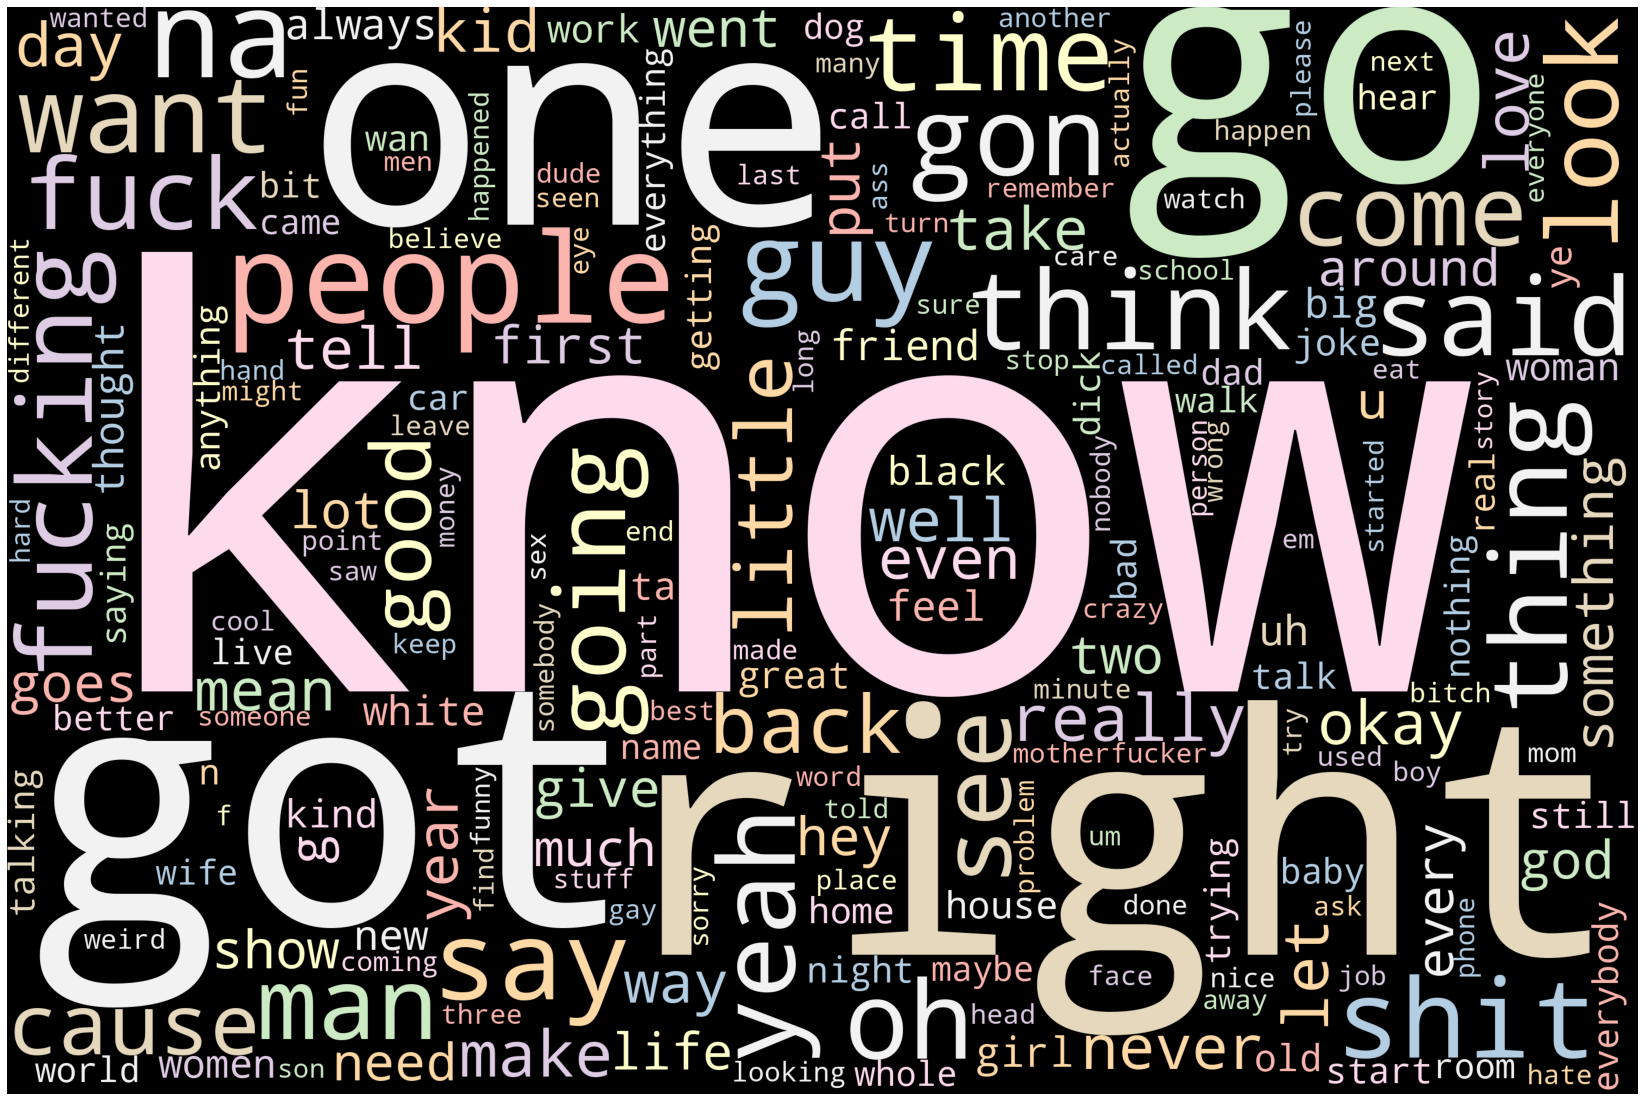

In [49]:
plot_cloud(word_cloud)